In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import utils

import numpy as np
np.random.seed(100)

In [2]:
#import dataset
import pandas as pd
dataset = pd.read_csv('CellDNA.csv',header=None)
print(dataset.info())

#Split X & y
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,13].values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1217 entries, 0 to 1216
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1217 non-null   int64  
 1   1       1217 non-null   float64
 2   2       1217 non-null   float64
 3   3       1217 non-null   float64
 4   4       1217 non-null   float64
 5   5       1217 non-null   float64
 6   6       1217 non-null   float64
 7   7       1217 non-null   int64  
 8   8       1217 non-null   int64  
 9   9       1217 non-null   float64
 10  10      1217 non-null   float64
 11  11      1217 non-null   float64
 12  12      1217 non-null   float64
 13  13      1217 non-null   int64  
dtypes: float64(10), int64(4)
memory usage: 133.2 KB
None


In [3]:
#Prepare/Standardize Data for training
#Split into training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

#Standardize X
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
# Fit data 
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

#binarize y
from sklearn.preprocessing import binarize
y_train = np.ravel(binarize(y_train.reshape(1,-1), 0))
y_test = np.ravel(binarize(y_test.reshape(1,-1), 0))

#categorize y
y_train = utils.to_categorical(y_train, 2)
y_test_cat = utils.to_categorical(y_test, 2)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_test_cat.shape)


(973, 13)
(973, 2)
(244, 13)
(244,)
(244, 2)


P:\Users\Jess\Anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass threshold=0 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
P:\Users\Jess\Anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass threshold=0 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [4]:
#create model
model = Sequential()

#input layer - 13 dimensions
model.add(Dense(units = 6, input_dim=13, activation = 'relu', name='h1'))
model.add(Dense(3, activation='relu', name='h2'))
# output layer - 2 classes
model.add(Dense(units = 2, activation = 'softmax', name='O'))                  

#Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#summarize layers
model.summary()

#Fit model to training data
model.fit(X_train, y_train, epochs=50, batch_size=4,verbose=0)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
h1 (Dense)                   (None, 6)                 84        
_________________________________________________________________
h2 (Dense)                   (None, 3)                 21        
_________________________________________________________________
O (Dense)                    (None, 2)                 8         
Total params: 113
Trainable params: 113
Non-trainable params: 0
_________________________________________________________________


In [5]:
#predict
y_pred_class = model.predict_classes(X_test)
y_pred_prob=model.predict_proba(X_test)

print('\n predicted classes \n')
print(y_pred_class)
print('\n probabilities\n')
print(y_pred_prob)




 predicted classes 

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0
 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0
 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 1]

 probabilities

[[8.59411955e-02 9.14058745e-01]
 [9.99999523e-01 4.58767943e-07]
 [7.99003065e-01 2.00996920e-01]
 [9.98192132e-01 1.80782250e-03]
 [9.99968529e-01 3.15046746e-05]
 [9.80098248e-01 1.99017748e-02]
 [9.92934525e-01 7.06549129e-03]
 [9.99783218e-01 2.16842818e-04]
 [9.99596298e-01 4.03751299e-04]
 [9.94847298e-01 5.15268603e-03]
 [9.94532943e-01 5.46707539e-03]
 [9.99967575e-01 3.24333669e-05]
 [9.98703957e-01 1.29608158e-03]
 [9.99835849e-01 1.64167926e-04]
 [9

In [6]:
# evaluate the model
train_scores=model.evaluate(X_train, y_train)
test_scores = model.evaluate(X_test, y_test_cat)
print('Train',"%s: %.2f%%" % (model.metrics_names[1], train_scores[1]*100))
print('Test',"%s: %.2f%%" % (model.metrics_names[1], test_scores[1]*100))


#Evaluating the predictions using a Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_class)
print('\n Confusion Matrix \n',cm)

#TP FP
#FP TN

244/244 [==============================] - 0s 33us/sample - loss: 0.2009 - accuracy: 0.9262
Train accuracy: 93.42%
Test accuracy: 92.62%

 Confusion Matrix 
 [[199   5]
 [ 13  27]]


In [7]:
#precision, recall, F-score for each class
from sklearn.metrics import classification_report

target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred_class, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.94      0.98      0.96       204
     class 1       0.84      0.68      0.75        40

    accuracy                           0.93       244
   macro avg       0.89      0.83      0.85       244
weighted avg       0.92      0.93      0.92       244



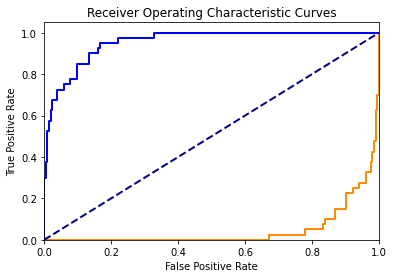

ROC AUC for Class 0: 0.046078
ROC AUC for Class 1: 0.953922


In [9]:
#ROC Curve for each class
from sklearn.metrics import roc_curve,roc_auc_score
import matplotlib.pyplot as plt

fpr0, tpr0, thresholds0 = roc_curve(y_test, y_pred_prob[:, 0])
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_pred_prob[:, 1])

plt.plot(fpr0, tpr0, color='darkorange', lw=2)
plt.plot(fpr1, tpr1, color='blue', lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curves')
plt.show()

print('ROC AUC for Class 0: %f' %  roc_auc_score(y_test, y_pred_prob[:, 0]) )
print('ROC AUC for Class 1: %f' %  roc_auc_score(y_test, y_pred_prob[:, 1]) )